一个文件中
driverTime = processTime + ___

有两组，取平均。

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

In [44]:
testStr = 'abcdefga'
testStr[testStr.find('g',1):]

'ga'

In [103]:
# Read data
def readDataFile(number):
    dataStr = open('C:/Users/BaTS/Desktop/CAS lab/res/res/Clustream-Qtimes1-KDDNine'+str(number)+'-0120-15000-20','r',encoding='UTF-8').read()
    # encoding='UTF-8' cannot be omitted
    processTime_locator = '\nProcessTime: ------------'
    processTime_1_from = dataStr.find(processTime_locator) + len(processTime_locator)
    processTime_1_to = dataStr.find('ms', processTime_1_from)
    processTime1 = int( dataStr[ processTime_1_from : processTime_1_to ] )

    driverTime_locator = '\nDriverTime: ------------'
    driverTime_1_from = dataStr.find(driverTime_locator) + len(driverTime_locator)
    driverTime_1_to = dataStr.find('ms', driverTime_1_from)
    driverTime1 = float( dataStr[ driverTime_1_from : driverTime_1_to ] )

    processTime_2_from = dataStr.find(processTime_locator, processTime_1_to) + len(processTime_locator)
    processTime_2_to = dataStr.find('ms', processTime_2_from)
    processTime2 = float( dataStr[ processTime_2_from : processTime_2_to ] )
    processTime = (processTime1 + processTime2)/2

    driverTime_2_from = dataStr.find(driverTime_locator,driverTime_1_to ) + len(driverTime_locator)
    driverTime_2_to = dataStr.find('ms', driverTime_2_from)
    driverTime2 = float( dataStr[ driverTime_2_from : driverTime_2_to ] )
    driverTime = (driverTime1 + driverTime2)/2
    return processTime,driverTime


processTime =np.array([])
driverTime =np.array([])
for i in range(6):
    p ,d = readDataFile(2**i)
    processTime = np.append(processTime,p)
    driverTime = np.append(driverTime,d)
#     driverTime.insert(d)
processTime,driverTime

(array([663376.5, 331563. , 182545. ,  93122. ,  61606.5,  46398.5]),
 array([330312.5, 164934. ,  91164. ,  45819.5,  30264.5,  21790.5]))

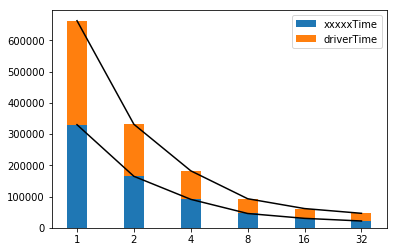

In [120]:
# graph

# x-axis ranges:
X = range(1,7)
# data is :
# processTime []
# driverTime []
transTime = processTime - driverTime 

# stacked bar
width = 0.35
p1 = plt.bar(X, driverTime, width)
p2 = plt.bar(X, transTime, width, bottom=driverTime)
# line

plt.plot(X,processTime,color='k')
plt.plot(X,driverTime,color='k')
plt.xticks(X, ('1', '2', '4', '8', '16','32'))
plt.legend((p1[0],p2[0]),('xxxxxTime','driverTime'))